The tabular results are stored in ./aggregated_score_return.csv and they are the following
                          MAPPO
Median          1.0 [1.0, 1.0]
IQM             1.0 [1.0, 1.0]
Mean            1.0 [1.0, 1.0]
Optimality Gap  0.0 [0.0, 0.0]
The latex tabular results are stored in ./aggregated_score_return_latex.txt


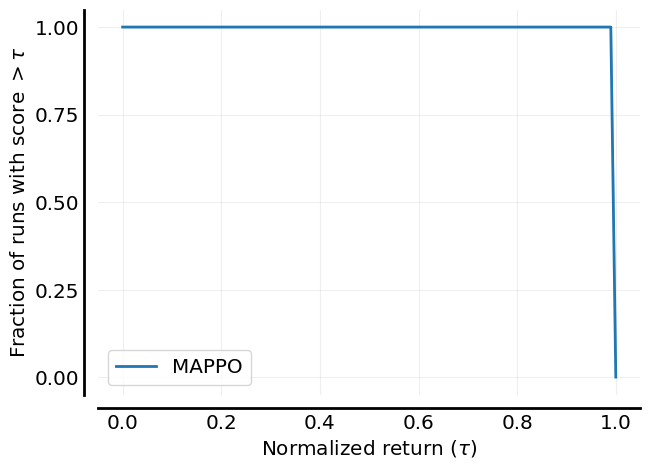

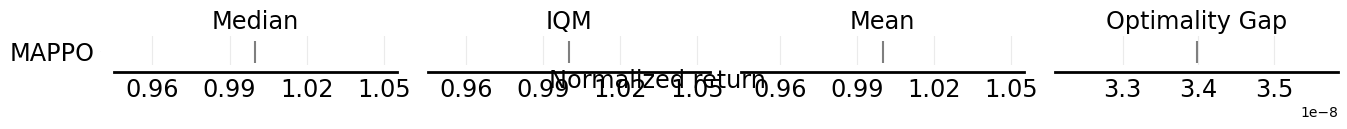

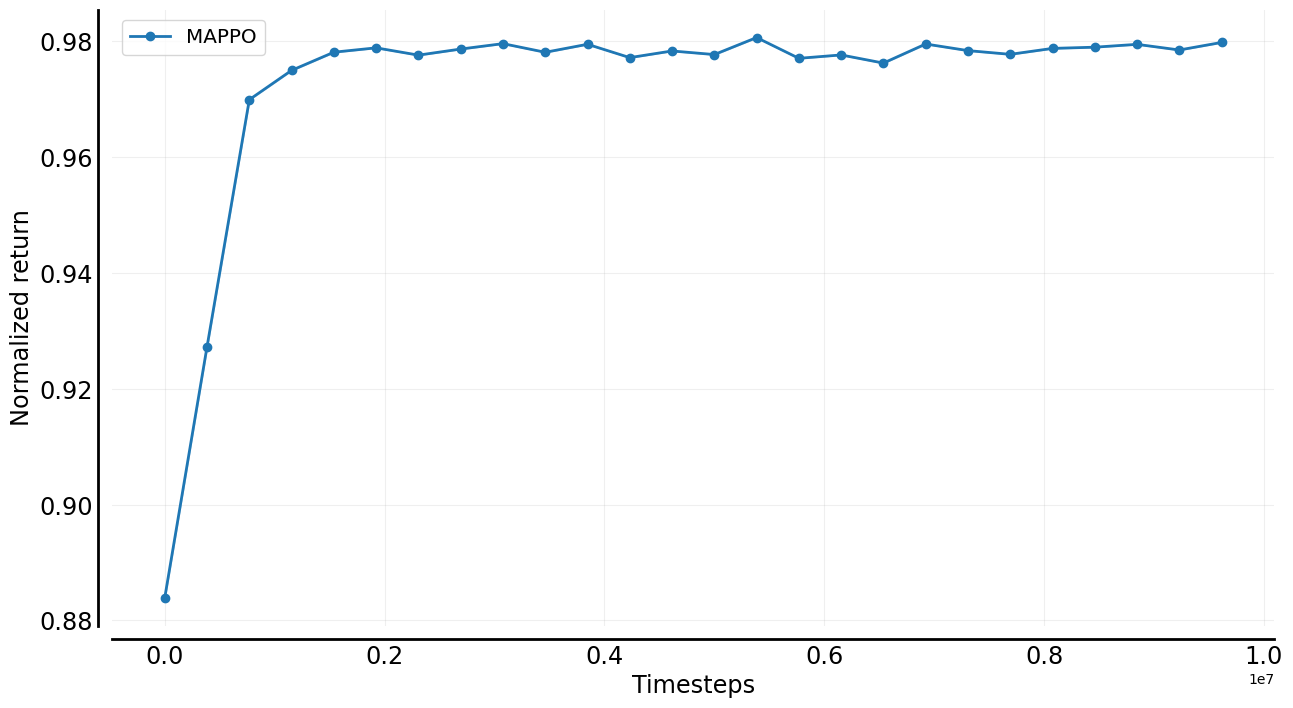

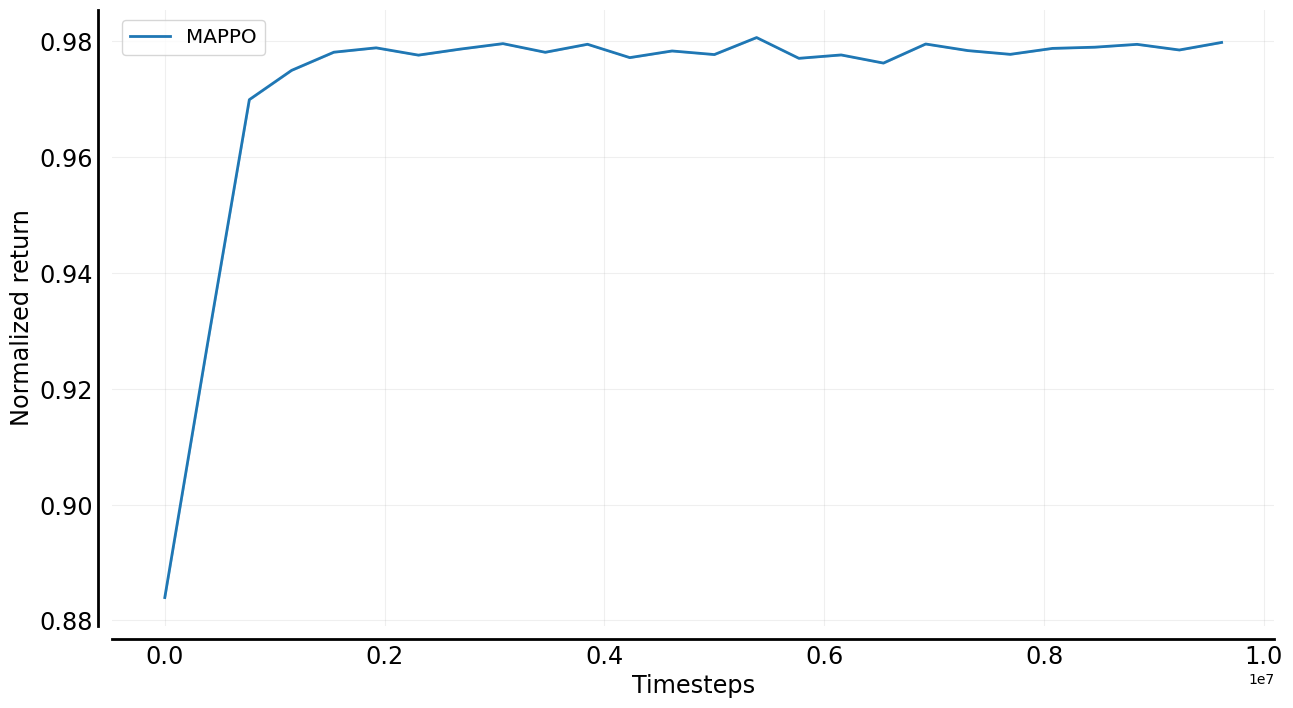

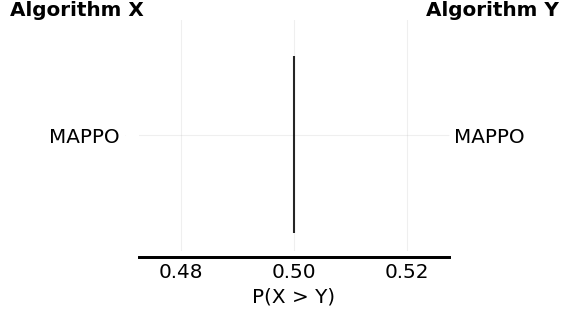

In [2]:
#  Copyright (c) Meta Platforms, Inc. and affiliates.
#
#  This source code is licensed under the license found in the
#  LICENSE file in the root directory of this source tree.
# adapted from marl-eval

from benchmarl.eval_results import load_and_merge_json_dicts, Plotting

from matplotlib import pyplot as plt


experiments_json_files = [
    "../results/GCP 6 Car/mappo_equivariant_navigation_sequencemodel__1fbd9b82_25_03_17-14_55_47.json",
    "../results/GNN 6 Car/mappo_equivariant_navigation_sequencemodel__a44c828b_25_03_17-17_43_23.json"
]

raw_dict = load_and_merge_json_dicts(experiments_json_files)

# Load and process experiment outputs
# raw_dict = load_and_merge_json_dicts(experiments_json_files)
processed_data = Plotting.process_data(raw_dict)
(
    environment_comparison_matrix,
    sample_efficiency_matrix,
) = Plotting.create_matrices(processed_data, env_name="vmas")

# Plotting
Plotting.performance_profile_figure(
    environment_comparison_matrix=environment_comparison_matrix
)
Plotting.aggregate_scores(
    environment_comparison_matrix=environment_comparison_matrix
)
Plotting.environemnt_sample_efficiency_curves(
    sample_effeciency_matrix=sample_efficiency_matrix
)
Plotting.task_sample_efficiency_curves(
    processed_data=processed_data, env="vmas", task="equivariant_navigation"
)
Plotting.probability_of_improvement(
    environment_comparison_matrix,
    algorithms_to_compare=[["mappo", "mappo"]],
)
plt.show()